In [404]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import pandas as pd
import seaborn as sns

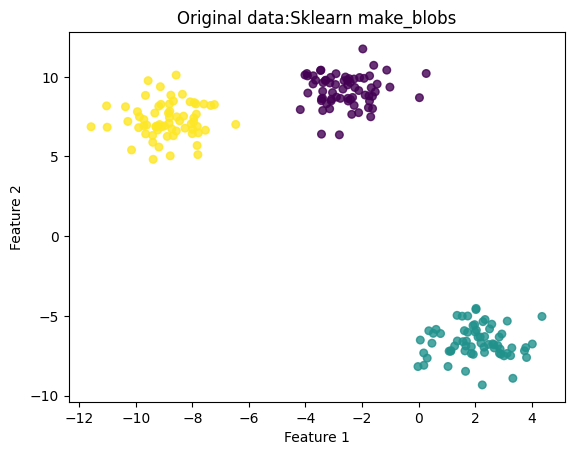

In [424]:
# 1. prepare data
X, Y = make_blobs(n_samples=200, centers=3, n_features=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
plt.title('Original data:Sklearn make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.grid(True)
plt.show()

In [425]:
# A
A = np.exp(-pairwise_distances(X, metric='euclidean'))
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000e+00,1.304287e-02,1.602186e-09,1.677916e-09,4.585827e-03,6.398945e-04,1.375089e-03,3.533582e-03,1.155376e-09,1.448799e-09,...,6.636328e-03,9.207394e-02,1.425347e-03,4.854989e-10,4.686244e-03,1.374141e-08,7.798405e-03,4.199341e-04,5.262348e-10,1.731700e-01
1,1.304287e-02,1.000000e+00,1.049656e-09,6.946508e-10,8.754708e-02,2.874443e-02,8.400715e-02,2.663326e-01,6.145701e-10,8.449345e-10,...,3.330640e-01,1.532571e-03,6.230580e-02,2.662454e-10,2.634674e-01,8.285409e-09,2.141225e-01,3.147574e-02,4.070149e-10,7.932535e-03
2,1.602186e-09,1.049656e-09,1.000000e+00,8.052334e-02,5.389066e-09,9.291256e-10,1.881764e-09,6.368790e-10,2.209420e-01,3.040426e-01,...,1.061374e-09,2.585242e-09,3.331532e-09,1.977894e-01,1.990394e-09,1.124293e-01,3.265955e-09,5.453868e-10,8.866122e-02,1.590910e-09
3,1.677916e-09,6.946508e-10,8.052334e-02,1.000000e+00,2.919638e-09,4.113636e-10,9.439231e-10,3.708033e-10,7.549926e-02,6.108560e-02,...,6.949553e-10,3.619546e-09,1.614738e-09,8.534684e-02,1.142680e-09,3.887695e-02,1.921953e-09,2.645399e-10,1.043442e-02,1.883836e-09
4,4.585827e-03,8.754708e-02,5.389066e-09,2.919638e-09,1.000000e+00,7.970322e-02,1.291182e-01,7.381604e-02,3.274002e-09,4.586543e-09,...,5.219303e-02,5.956913e-04,2.290917e-01,1.375895e-09,2.067315e-01,4.218511e-08,4.042620e-01,2.176924e-02,2.527809e-09,1.984412e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.374141e-08,8.285409e-09,1.124293e-01,3.887695e-02,4.218511e-08,6.814954e-09,1.369687e-08,4.837755e-09,6.805009e-02,9.391033e-02,...,8.053583e-09,2.164119e-08,2.452219e-08,3.210222e-02,1.520778e-08,1.000000e+00,2.569499e-08,3.746505e-09,2.484507e-02,1.308635e-08
196,7.798405e-03,2.141225e-01,3.265955e-09,1.921953e-09,4.042620e-01,6.166874e-02,1.500454e-01,1.457372e-01,1.948511e-09,2.709823e-09,...,1.211226e-01,9.661865e-04,1.822492e-01,8.296028e-10,3.976281e-01,2.569499e-08,1.000000e+00,2.944974e-02,1.408629e-09,3.790759e-03
197,4.199341e-04,3.147574e-02,5.453868e-10,2.645399e-10,2.176924e-02,5.719965e-02,1.663218e-01,1.054979e-01,2.713179e-10,3.961794e-10,...,5.637296e-02,5.540676e-05,7.744238e-02,1.245039e-10,7.026205e-02,3.746505e-09,2.944974e-02,1.000000e+00,2.369201e-10,3.215746e-04
198,5.262348e-10,4.070149e-10,8.866122e-02,1.043442e-02,2.527809e-09,5.102989e-10,8.481567e-10,2.639914e-10,1.143651e-01,1.496930e-01,...,3.869631e-10,7.124286e-10,1.589824e-09,9.209532e-02,8.360684e-10,2.484507e-02,1.408629e-09,2.369201e-10,1.000000e+00,4.400066e-10


In [426]:
# A -> D -> L
D = np.diag(np.sum(A, axis=1))
L = D - A
pd.DataFrame(L)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.059741e+01,-1.304287e-02,-1.602186e-09,-1.677916e-09,-4.585827e-03,-6.398945e-04,-1.375089e-03,-3.533582e-03,-1.155376e-09,-1.448799e-09,...,-6.636328e-03,-9.207394e-02,-1.425347e-03,-4.854989e-10,-4.686244e-03,-1.374141e-08,-7.798405e-03,-4.199341e-04,-5.262348e-10,-1.731700e-01
1,-1.304287e-02,7.929890e+00,-1.049656e-09,-6.946508e-10,-8.754708e-02,-2.874443e-02,-8.400715e-02,-2.663326e-01,-6.145701e-10,-8.449345e-10,...,-3.330640e-01,-1.532571e-03,-6.230580e-02,-2.662454e-10,-2.634674e-01,-8.285409e-09,-2.141225e-01,-3.147574e-02,-4.070149e-10,-7.932535e-03
2,-1.602186e-09,-1.049656e-09,1.537983e+01,-8.052334e-02,-5.389066e-09,-9.291256e-10,-1.881764e-09,-6.368790e-10,-2.209420e-01,-3.040426e-01,...,-1.061374e-09,-2.585242e-09,-3.331532e-09,-1.977894e-01,-1.990394e-09,-1.124293e-01,-3.265955e-09,-5.453868e-10,-8.866122e-02,-1.590910e-09
3,-1.677916e-09,-6.946508e-10,-8.052334e-02,5.619349e+00,-2.919638e-09,-4.113636e-10,-9.439231e-10,-3.708033e-10,-7.549926e-02,-6.108560e-02,...,-6.949553e-10,-3.619546e-09,-1.614738e-09,-8.534684e-02,-1.142680e-09,-3.887695e-02,-1.921953e-09,-2.645399e-10,-1.043442e-02,-1.883836e-09
4,-4.585827e-03,-8.754708e-02,-5.389066e-09,-2.919638e-09,1.120323e+01,-7.970322e-02,-1.291182e-01,-7.381604e-02,-3.274002e-09,-4.586543e-09,...,-5.219303e-02,-5.956913e-04,-2.290917e-01,-1.375895e-09,-2.067315e-01,-4.218511e-08,-4.042620e-01,-2.176924e-02,-2.527809e-09,-1.984412e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.374141e-08,-8.285409e-09,-1.124293e-01,-3.887695e-02,-4.218511e-08,-6.814954e-09,-1.369687e-08,-4.837755e-09,-6.805009e-02,-9.391033e-02,...,-8.053583e-09,-2.164119e-08,-2.452219e-08,-3.210222e-02,-1.520778e-08,8.305442e+00,-2.569499e-08,-3.746505e-09,-2.484507e-02,-1.308635e-08
196,-7.798405e-03,-2.141225e-01,-3.265955e-09,-1.921953e-09,-4.042620e-01,-6.166874e-02,-1.500454e-01,-1.457372e-01,-1.948511e-09,-2.709823e-09,...,-1.211226e-01,-9.661865e-04,-1.822492e-01,-8.296028e-10,-3.976281e-01,-2.569499e-08,1.209802e+01,-2.944974e-02,-1.408629e-09,-3.790759e-03
197,-4.199341e-04,-3.147574e-02,-5.453868e-10,-2.645399e-10,-2.176924e-02,-5.719965e-02,-1.663218e-01,-1.054979e-01,-2.713179e-10,-3.961794e-10,...,-5.637296e-02,-5.540676e-05,-7.744238e-02,-1.245039e-10,-7.026205e-02,-3.746505e-09,-2.944974e-02,4.662092e+00,-2.369201e-10,-3.215746e-04
198,-5.262348e-10,-4.070149e-10,-8.866122e-02,-1.043442e-02,-2.527809e-09,-5.102989e-10,-8.481567e-10,-2.639914e-10,-1.143651e-01,-1.496930e-01,...,-3.869631e-10,-7.124286e-10,-1.589824e-09,-9.209532e-02,-8.360684e-10,-2.484507e-02,-1.408629e-09,-2.369201e-10,6.013076e+00,-4.400066e-10


In [427]:
# Is L invertible?
np.linalg.inv(L)

tensor([[8.72790625e+12, 8.72790625e+12, 8.72790624e+12, ...,
         8.72790625e+12, 8.72790624e+12, 8.72790625e+12],
        [8.72790625e+12, 8.72790625e+12, 8.72790624e+12, ...,
         8.72790625e+12, 8.72790624e+12, 8.72790625e+12],
        [8.72790624e+12, 8.72790624e+12, 8.72790625e+12, ...,
         8.72790624e+12, 8.72790625e+12, 8.72790624e+12],
        ...,
        [8.72790625e+12, 8.72790625e+12, 8.72790624e+12, ...,
         8.72790625e+12, 8.72790624e+12, 8.72790625e+12],
        [8.72790624e+12, 8.72790624e+12, 8.72790625e+12, ...,
         8.72790624e+12, 8.72790625e+12, 8.72790624e+12],
        [8.72790625e+12, 8.72790625e+12, 8.72790624e+12, ...,
         8.72790625e+12, 8.72790624e+12, 8.72790625e+12]], requires_grad=True)

In [428]:
L_inv = np.linalg.inv(L)
norm = np.linalg.norm(L_inv)
L_inv_norm = L_inv / norm
L_inv_norm

tensor([[0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
        [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
        [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
        ...,
        [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
        [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
        [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005]], requires_grad=True)

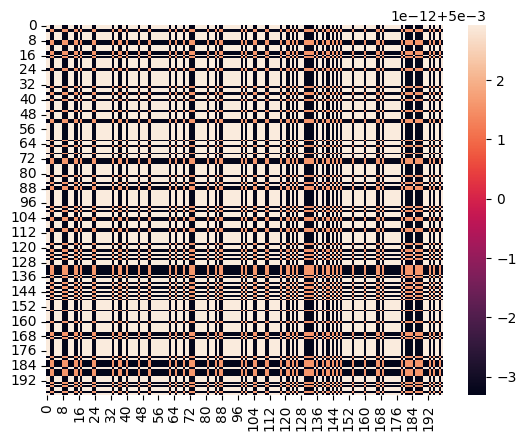

In [429]:
sns.heatmap(L_inv_norm)
plt.show()

In [430]:
# find the least dominant 
val, vec = eigh(L)
Z = normalize(vec[:, :3])
print(len(vec))
sorted(val)[:3]

200


[1.264848761892711e-14, 1.1585518772871995e-06, 0.1692527028405877]

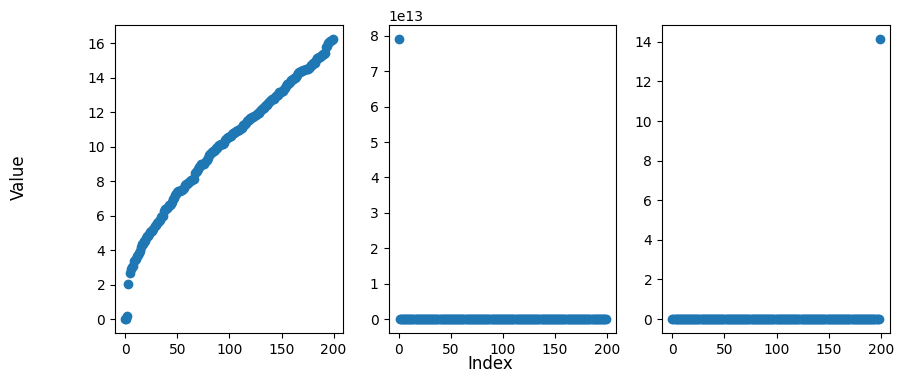

In [431]:
inv_val, inv_vec = eigh(normalize(L_inv))
inv_Z = normalize(inv_vec[:, -3:])

fig, axs = plt.subplots(1,3, figsize=(10,4))
axs[0].scatter(range(len(val)), val)
axs[1].scatter(range(len(val)), 1/val)
axs[2].scatter(range(len(val)), inv_val)
fig.supxlabel('Index')
fig.supylabel('Value')
plt.show()

In [432]:
val[-5:]

array([16.0038882 , 16.10613119, 16.11409653, 16.18183728, 16.25390845])

In [433]:
inv_val[-3:]

array([5.61410647e-10, 6.95733567e-09, 1.41421356e+01])

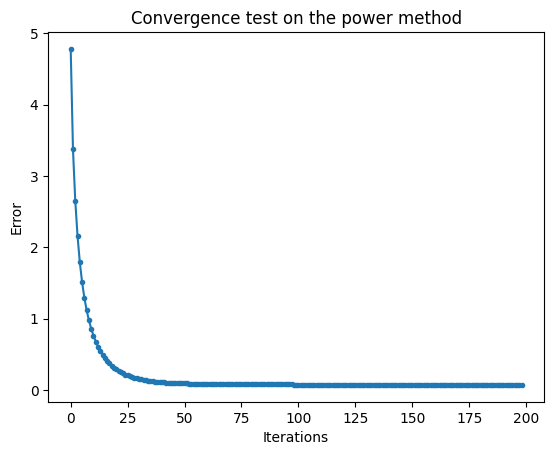

In [434]:
def power_method(A, num_iter=200, tol=1e-6):
    n = A.shape[0]
    b_k = np.ones(n)

    for _ in range(num_iter):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k_next = b_k1 / b_k1_norm
        
        # Convergence check
        if np.linalg.norm(b_k_next - b_k) < tol:
            break
        b_k = b_k_next

    # cal the dominant eigenvalue based on Rayleigh quotient
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    return eigenvalue, b_k

# convergence test 
iter_diff = []
for i in range(1,200):
    eigenvalue, eigenvector = power_method(L, num_iter=i)
    iter_diff.append(val[-1]-eigenvalue)

plt.plot(range(len(iter_diff)), iter_diff,'.-')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Convergence test on the power method')
plt.show()

Dominant Eigenvalue estimated by power method : 16.182037998103805
Dominant Eigenvalue: 16.25390844639316


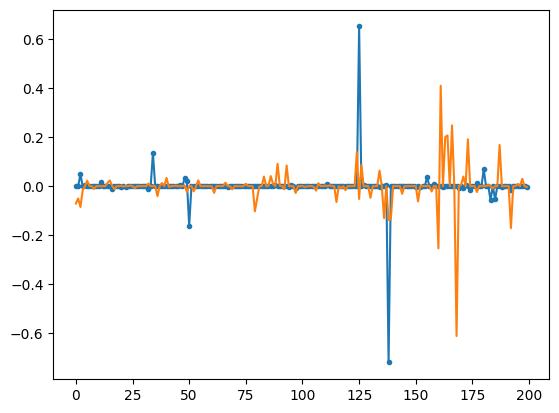

In [435]:
p_val, p_vec = power_method(L, num_iter=200)
print("Dominant Eigenvalue estimated by power method :", eigenvalue)
print("Dominant Eigenvalue:", val[-1])

# visualize the dominant eigenvector
plt.plot(range(200), p_vec.flatten(),'.-')
plt.plot(range(200), vec[-1])
plt.show()

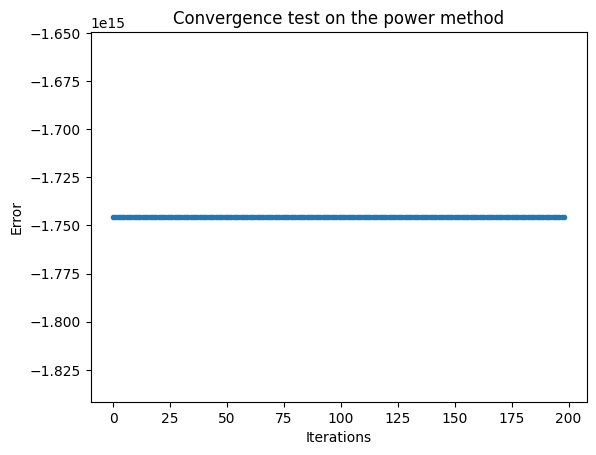

In [436]:
# convergence test 
iter_diff = []
for i in range(1,200):
    eigenvalue, eigenvector = power_method(L_inv, num_iter=i)
    iter_diff.append(val[-1]-eigenvalue)

plt.plot(range(len(iter_diff)), iter_diff,'.-')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Convergence test on the power method')
plt.show()

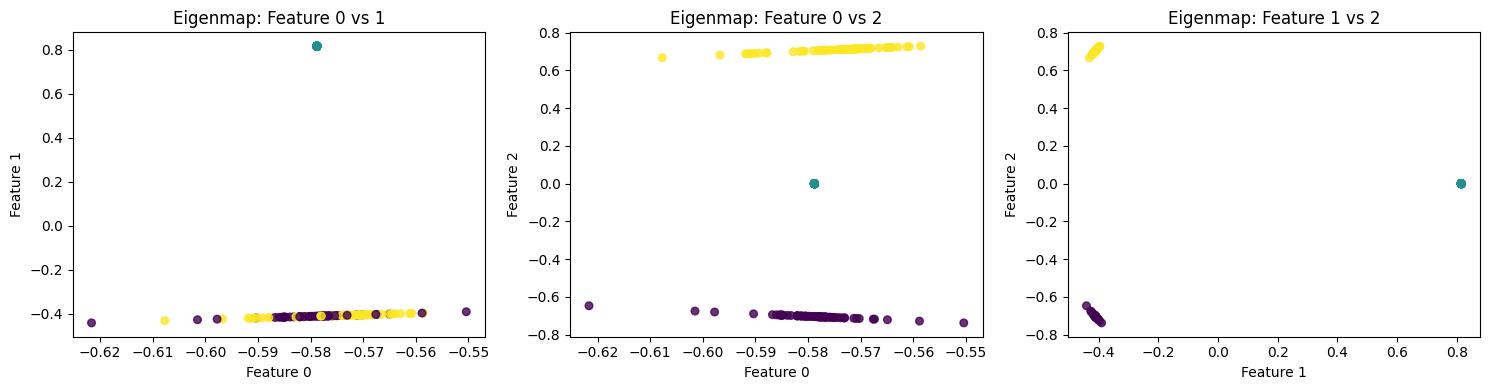

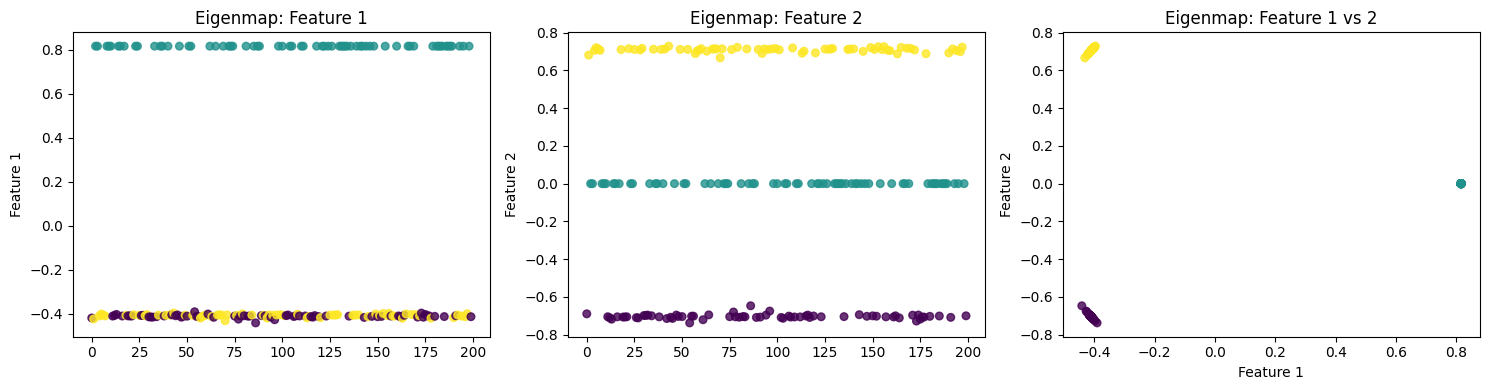

In [437]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(Z[:, 0], Z[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 0 vs 1')
axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(Z[:, 0], Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 0 vs 2')
axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(Z[:, 1], Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(range(len(Z[:, 1])), Z[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 1')
# axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(range(len(Z[:, 2])), Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 2')
# axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(Z[:, 1], Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

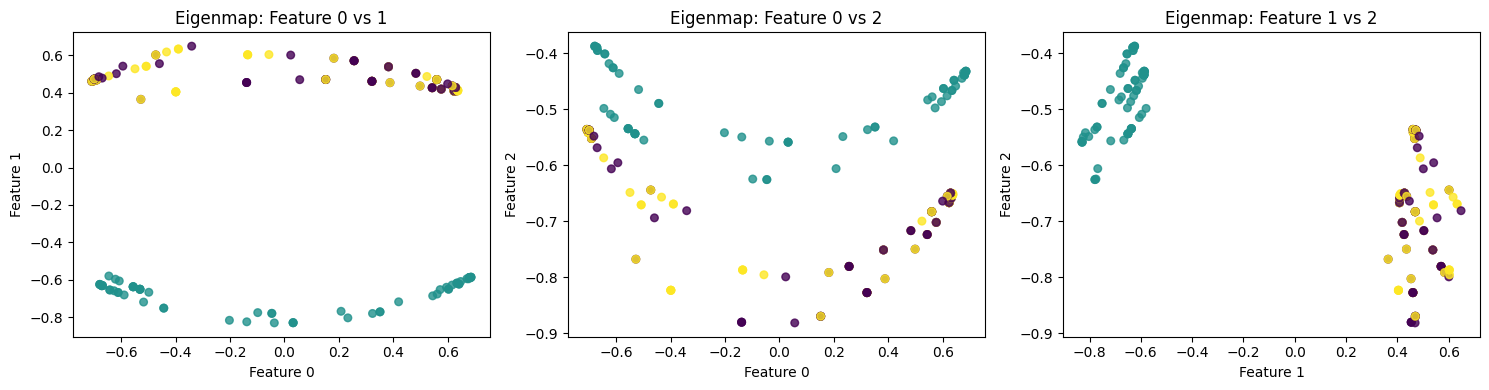

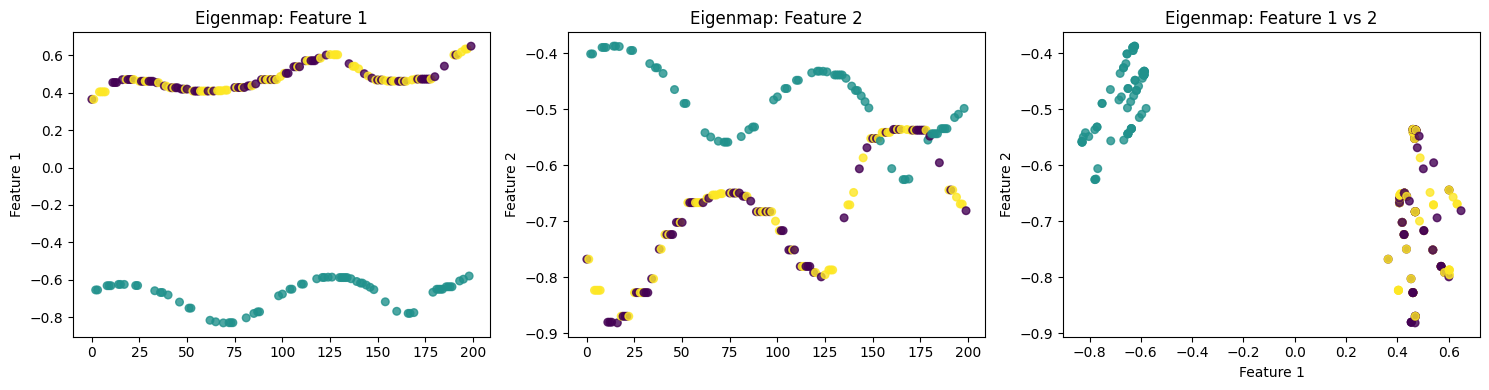

In [441]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(inv_Z[:, 0], inv_Z[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 0 vs 1')
axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(inv_Z[:, 0], inv_Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 0 vs 2')
axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(inv_Z[:, 1], inv_Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(range(len(inv_Z[:, 1])), inv_Z[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 1')
# axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(range(len(inv_Z[:, 2])), inv_Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 2')
# axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(inv_Z[:, 1], inv_Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

<Axes: >

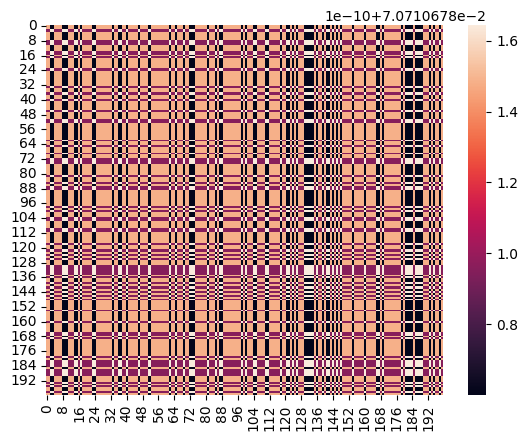

In [442]:
sns.heatmap(normalize(L_inv))

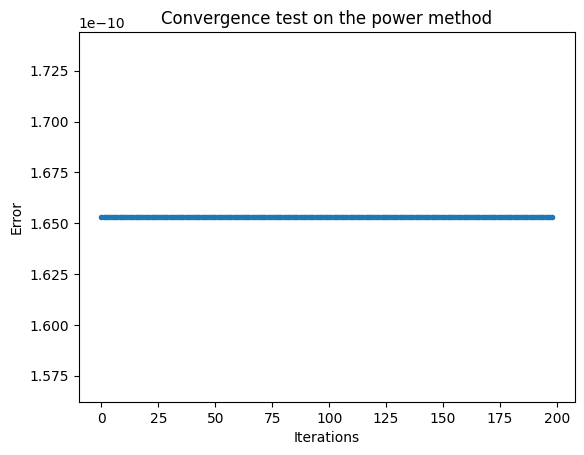

In [443]:
# convergence test 
iter_diff = []
for i in range(1,200):
    eigenvalue, eigenvector = power_method(normalize(L_inv), num_iter=i)
    iter_diff.append(inv_val[-1]-eigenvalue)

plt.plot(range(len(iter_diff)), iter_diff,'.-')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Convergence test on the power method')
plt.show() # converged right away; at the first iteration

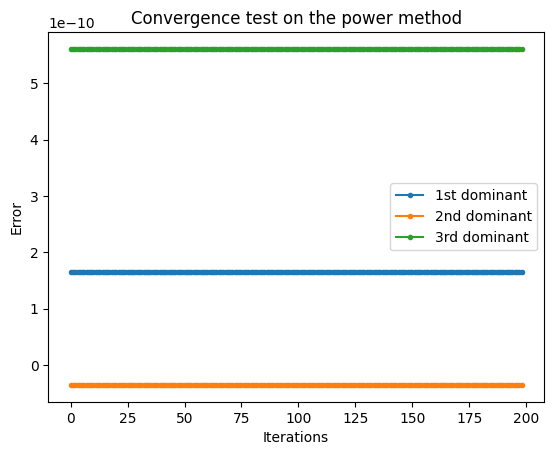

In [445]:
def orthogonal_iteration(A, k, num_iter=100):
    n = A.shape[0]
    
    Q = np.eye(n,k)
    Q, _ = np.linalg.qr(Q)  # orthonormalize

    for _ in range(num_iter):
        Z = A @ Q           # power method
        Q, _ = np.linalg.qr(Z)  # orthonormalize

    # Estimate eigenvalues 
    T = Q.T @ A @ Q
    eigvals, eigvecs = np.linalg.eig(T)

    # Recover approximate eigenvectors of A
    approx_eigenvectors = Q @ eigvecs
    return eigvals, approx_eigenvectors

# 3 dominant eigenpairs
# orth_val, orth_vec = orthogonal_iteration(normalize(L_inv), k=3)
# for i in range(3):
#     print(f"Eigenvalue {i+1}: {orth_val[i]}")

# convergence test 
iter_diff_1 = []
iter_diff_2 = []
iter_diff_3 = []
for i in range(1,200):
    orth_val, orth_vec = orthogonal_iteration(normalize(L_inv), k=3)
    iter_diff_1.append(inv_val[-1]-orth_val[0])
    iter_diff_2.append(inv_val[-2]-orth_val[1])
    iter_diff_3.append(inv_val[-3]-orth_val[2])

plt.plot(range(len(iter_diff_1)), iter_diff_1,'.-', label='1st dominant')
plt.plot(range(len(iter_diff_2)), iter_diff_2,'.-', label='2nd dominant')
plt.plot(range(len(iter_diff_3)), iter_diff_3,'.-', label='3rd dominant')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Convergence test on the power method')
plt.legend()
plt.show() # fast convergence

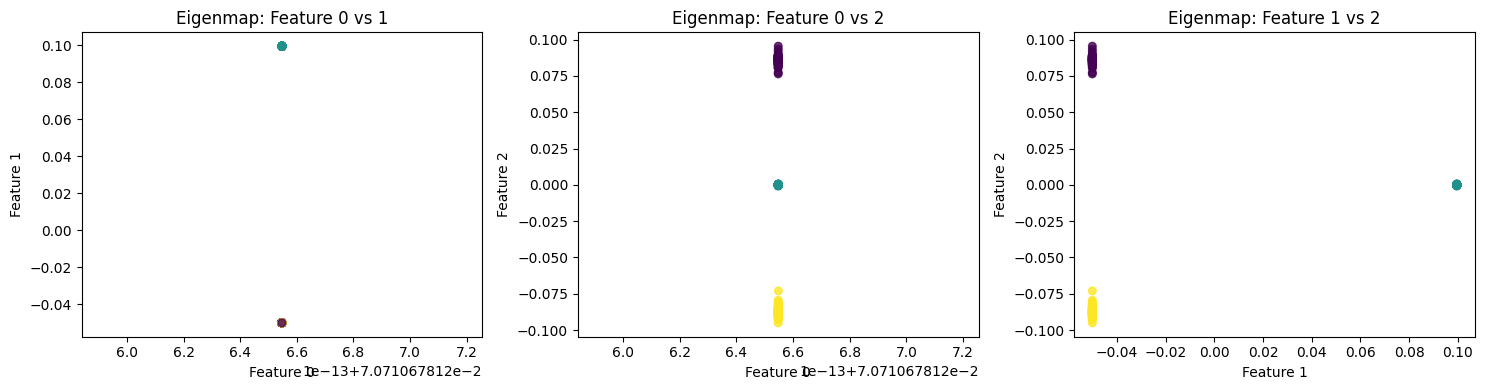

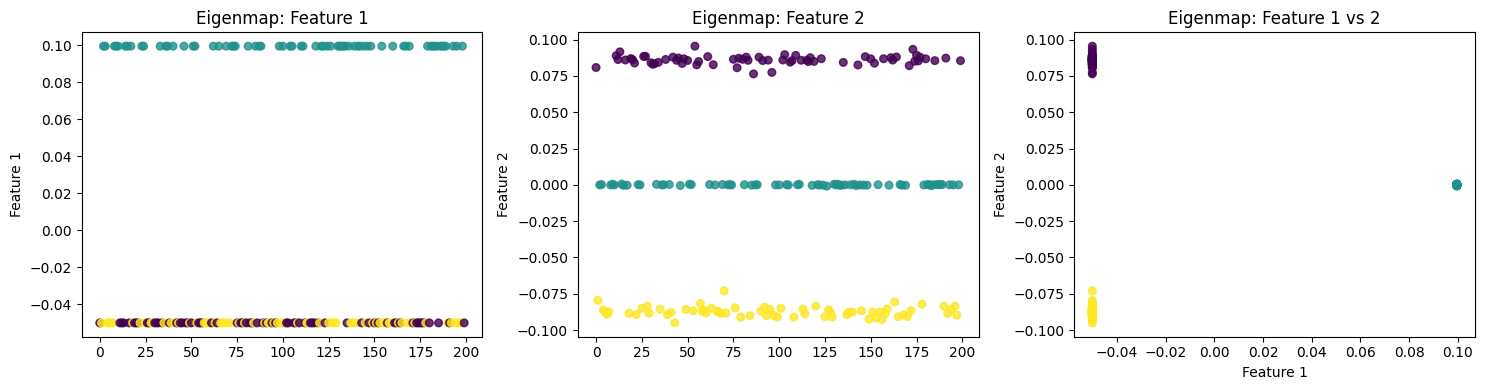

In [446]:
# test their performance
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(orth_vec[:, 0], orth_vec[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 0 vs 1')
axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(orth_vec[:, 0], orth_vec[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 0 vs 2')
axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(orth_vec[:, 1], orth_vec[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(range(len(orth_vec[:, 1])), orth_vec[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 1')
# axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(range(len(orth_vec[:, 2])), orth_vec[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 2')
# axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(orth_vec[:, 1], orth_vec[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [455]:
def power_method(A, num_iter=200, tol=1e-6):
    n = A.shape[0]
    b = np.random.random(n)
    b /= np.linalg.norm(b)

    for _ in range(num_iter):
        b_next = A @ b
        b_next /= np.linalg.norm(b_next)
        if np.linalg.norm(b - b_next) < tol:
            break
        b = b_next

    eigenvalue = b @ (A @ b)
    return eigenvalue, b

def deflate(A, eigenvalue, eigenvector):
    return A - eigenvalue * np.outer(eigenvector, eigenvector)

# Invert the Laplacian to target smallest eigenvalues
L_inv = np.linalg.pinv(L + np.eye(L.shape[0]) * 1e-5)  # avoid singularity
L_inv = normalize(L_inv)

eigval1, eigvec1 = power_method(L_inv)
L_inv_deflated = deflate(L_inv, eigval1, eigvec1)
eigval2, eigvec2 = power_method(L_inv_deflated)
L_inv_deflated_2 = deflate(L_inv_deflated, eigval2, eigvec2)
eigval3, eigvec3 = power_method(L_inv_deflated_2)

print(eigval1, eigval2, eigval3)

11.59135633723954 8.100406838811057 0.0007049859186113561


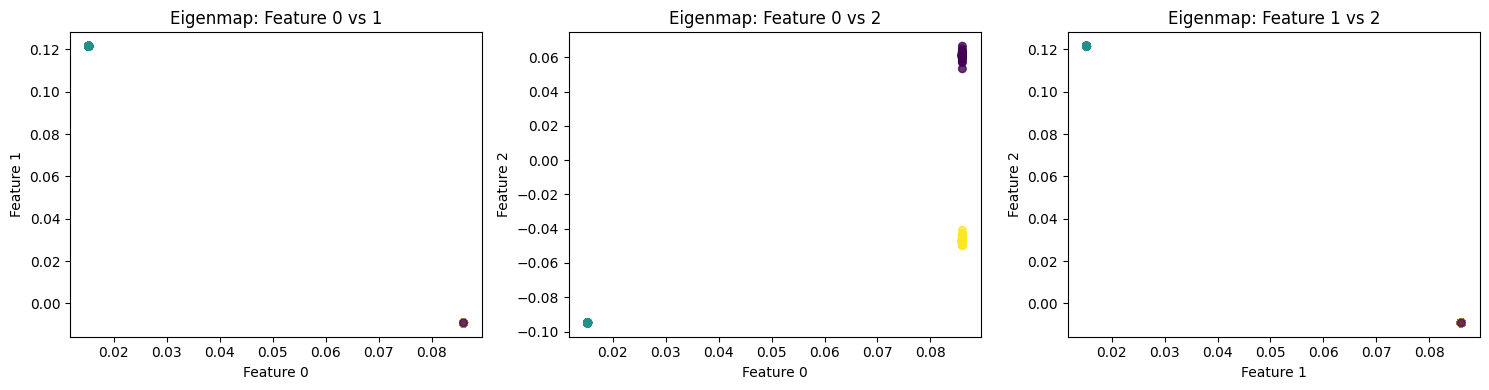

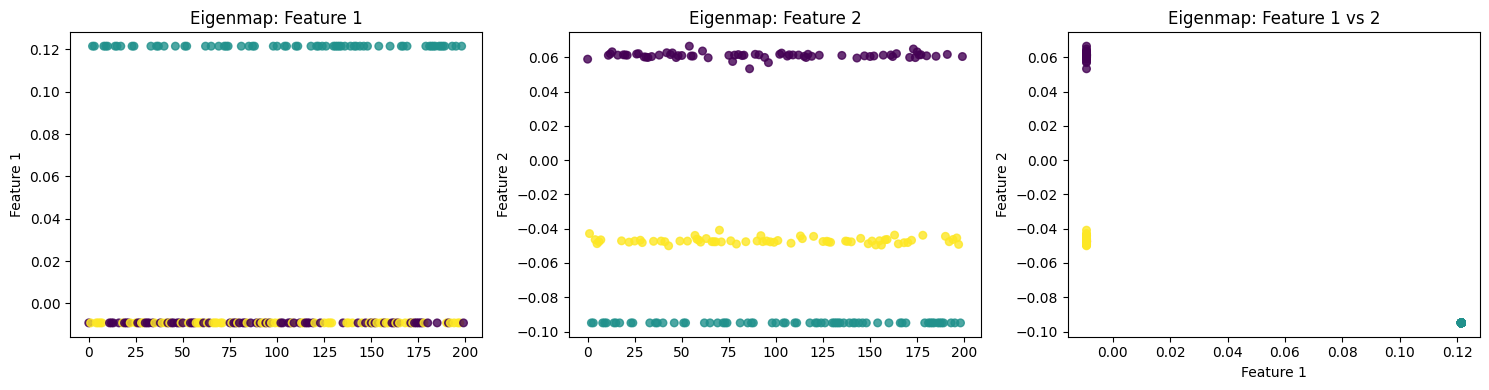

In [456]:
# test their performance
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(eigvec1, eigvec2, c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 0 vs 1')
axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(eigvec1, eigvec3, c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 0 vs 2')
axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(eigvec1, eigvec2, c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Feature 0 vs Feature 1
axs[0].scatter(range(len(eigvec2)), eigvec2, c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('Eigenmap: Feature 1')
# axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')

# Plot 2: Feature 0 vs Feature 2
axs[1].scatter(range(len(eigvec3)), eigvec3, c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('Eigenmap: Feature 2')
# axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 2')

# Plot 3: Feature 1 vs Feature 2
axs[2].scatter(eigvec2, eigvec3, c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('Eigenmap: Feature 1 vs 2')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [367]:
import pennylane as qml
from pennylane import numpy as np

# ▶️ Submatrix from your 200x200 Laplacian
L_small = np.array([[ 2, -1,  0, -1],
                    [-1,  3, -1, -1],
                    [ 0, -1,  2, -1],
                    [-1, -1, -1,  3]])

H = qml.Hermitian(L_small, wires=[0, 1])
dev = qml.device("default.qubit", wires=2)

# Variational circuit block
def variational_block(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])

# QNode to return expectation value
@qml.qnode(dev)
def expectation_circuit(params):
    variational_block(params)
    return qml.expval(H)

# QNode to return quantum state
@qml.qnode(dev)
def state_circuit(params):
    variational_block(params)
    return qml.state()

# Optimizer
def optimize(cost_fn, steps=100):
    opt = qml.GradientDescentOptimizer(stepsize=0.2)
    params = np.array([0.01, 0.01], requires_grad=True)
    for _ in range(steps):
        params = opt.step(cost_fn, params)
    return params

# 🧠 Round 1: First eigenvector
params1 = optimize(expectation_circuit)
state1 = state_circuit(params1)

# 🧠 Round 2: Penalize overlap with state1
def cost_with_penalty_1(params):
    state_current = state_circuit(params)
    overlap = np.abs(np.dot(np.conj(state_current), state1))**2
    return expectation_circuit(params) + 5 * overlap

params2 = optimize(cost_with_penalty_1)
state2 = state_circuit(params2)

# 🧠 Round 3: Penalize overlap with state1 and state2
def cost_with_penalty_2(params):
    state_current = state_circuit(params)
    overlap1 = np.abs(np.dot(np.conj(state_current), state1))**2
    overlap2 = np.abs(np.dot(np.conj(state_current), state2))**2
    return expectation_circuit(params) + 5 * (overlap1 + overlap2)

params3 = optimize(cost_with_penalty_2)
state3 = state_circuit(params3)

# ⏬ Estimate eigenvalues from optimized parameters
eigenvalues = [
    expval_circuit(params1),
    expval_circuit(params2),
    expval_circuit(params3)
]

# 📦 Display eigenvectors and their eigenvalues
for i, (state, eigval) in enumerate(zip([state1, state2, state3], eigenvalues), 1):
    print(f"\nEigenvector {i}:\n", np.round(state, 4))
    print(f"Estimated eigenvalue {i}: {np.round(eigval, 6)}")


Eigenvector 1:
 [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
Estimated eigenvalue 1: 0.0

Eigenvector 2:
 [ 0.9899+0.j -0.1   +0.j  0.0101+0.j -0.1   +0.j]
Estimated eigenvalue 2: 2.4

Eigenvector 3:
 [ 0.0076+0.j -0.087 +0.j  0.9924+0.j -0.087 +0.j]
Estimated eigenvalue 3: 2.347834


In [ ]:
H = qml.Hermitian(L, wires=range(8))
dev = qml.device("default.qubit", wires=8)

# Variational circuit block
def variational_block(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])

# QNode to return expectation value
@qml.qnode(dev)
def expectation_circuit(params):
    variational_block(params)
    return qml.expval(H)

# QNode to return quantum state
@qml.qnode(dev)
def state_circuit(params):
    variational_block(params)
    return qml.state()

# Optimizer
def optimize(cost_fn, steps=100):
    opt = qml.GradientDescentOptimizer(stepsize=0.2)
    params = np.array([0.01, 0.01], requires_grad=True)
    for _ in range(steps):
        params = opt.step(cost_fn, params)
    return params

# 🧠 Round 1: First eigenvector
params1 = optimize(expectation_circuit)
state1 = state_circuit(params1)

# 🧠 Round 2: Penalize overlap with state1
def cost_with_penalty_1(params):
    state_current = state_circuit(params)
    overlap = np.abs(np.dot(np.conj(state_current), state1))**2
    return expectation_circuit(params) + 5 * overlap

params2 = optimize(cost_with_penalty_1)
state2 = state_circuit(params2)

# 🧠 Round 3: Penalize overlap with state1 and state2
def cost_with_penalty_2(params):
    state_current = state_circuit(params)
    overlap1 = np.abs(np.dot(np.conj(state_current), state1))**2
    overlap2 = np.abs(np.dot(np.conj(state_current), state2))**2
    return expectation_circuit(params) + 5 * (overlap1 + overlap2)

params3 = optimize(cost_with_penalty_2)
state3 = state_circuit(params3)

# 🔍 Display results
for i, state in enumerate([state1, state2, state3], start=1):
    print(f"Eigenvector {i}:\n", np.round(state, 4))

In [360]:
import pennylane as qml
from pennylane import numpy as np

# 🧠 Step 1: Load your Laplacian (mock 200x200)
L_full = L
L_full = (L_full + L_full.T) / 2  # Ensure it's symmetric

# 🧩 Step 2: Select submatrix (e.g., nodes 10–13 → 4x4)
nodes = [10, 11, 12, 13]
L_sub = L_full[np.ix_(nodes, nodes)]

# ✅ Step 3: Encode observable and device
H = qml.Hermitian(L_sub, wires=[0, 1])
dev = qml.device("default.qubit", wires=2)

def block(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev)
def expval_circuit(params):
    block(params)
    return qml.expval(H)

@qml.qnode(dev)
def state_circuit(params):
    block(params)
    return qml.state()

# 🛠 Optimization loop
def optimize(cost_fn, steps=100):
    opt = qml.GradientDescentOptimizer(0.2)
    params = np.array([0.01, 0.01], requires_grad=True)
    for _ in range(steps):
        params = opt.step(cost_fn, params)
    return params

# 🔁 Round 1
params1 = optimize(expval_circuit)
state1 = state_circuit(params1)

# 🔁 Round 2
def cost_penalty_1(params):
    state_current = state_circuit(params)
    overlap = np.abs(np.dot(np.conj(state_current), state1))**2
    return expval_circuit(params) + 5 * overlap

params2 = optimize(cost_penalty_1)
state2 = state_circuit(params2)

# 🔁 Round 3
def cost_penalty_2(params):
    state_current = state_circuit(params)
    overlap1 = np.abs(np.dot(np.conj(state_current), state1))**2
    overlap2 = np.abs(np.dot(np.conj(state_current), state2))**2
    return expval_circuit(params) + 5 * (overlap1 + overlap2)

params3 = optimize(cost_penalty_2)
state3 = state_circuit(params3)

# 🎯 Results
for i, state in enumerate([state1, state2, state3], 1):
    print(f"Eigenvector {i}:\n", np.round(state, 4))

Eigenvector 1:
 [2.000e-04+0.j 0.000e+00+0.j 1.770e-02+0.j 9.998e-01+0.j]
Eigenvector 2:
 [2.000e-04+0.j 0.000e+00+0.j 1.770e-02+0.j 9.998e-01+0.j]
Eigenvector 3:
 [ 1.e+00+0.j -0.e+00+0.j  0.e+00+0.j -7.e-04+0.j]


In [361]:
# ⏬ Estimate eigenvalues from optimized parameters
eigenvalues = [
    expval_circuit(params1),
    expval_circuit(params2),
    expval_circuit(params3)
]

# 📦 Display eigenvectors and their eigenvalues
for i, (state, eigval) in enumerate(zip([state1, state2, state3], eigenvalues), 1):
    print(f"\nEigenvector {i}:\n", np.round(state, 4))
    print(f"Estimated eigenvalue {i}: {np.round(eigval, 6)}")


Eigenvector 1:
 [2.000e-04+0.j 0.000e+00+0.j 1.770e-02+0.j 9.998e-01+0.j]
Estimated eigenvalue 1: 4.138859

Eigenvector 2:
 [2.000e-04+0.j 0.000e+00+0.j 1.770e-02+0.j 9.998e-01+0.j]
Estimated eigenvalue 2: 4.138859

Eigenvector 3:
 [ 1.e+00+0.j -0.e+00+0.j  0.e+00+0.j -7.e-04+0.j]
Estimated eigenvalue 3: 11.870087
